In [2]:
import pandas as pd
data = pd.read_csv('trip.csv')
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [ ]:
#결측지 확인
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [9]:
data[data['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [13]:
fare_amount_na_index = data[data['fare_amount'].isna()].index
fare_amount_na_index

Index([52, 189, 244], dtype='int64')

In [21]:
#결측치 제거
data.dropna()
#원본 반영
data=data.dropna()


In [ ]:
#결측치 특정 칼럼 제거 ->리스트 형태로
#data.dropna(subset=['fare_amount'])
#데이터가 충분히 크지 않으면 유실이 크다

#결측치 대체
#null 값에 mean, median, 최빈값 등으로 대체 가능

#data.fillna(999)
#결측치가 여러 컬럼일 때, 특정 칼럼 값 대체하기
#data['fare_amount'].fillna(999)

#결측치 특정 칼럼 대체 후 원본에 반영
#data['fare_amount'] = data['fare_amount'].fillna(999)

#결측치가 너무 많아서 컬럼 자체를 drop
#data.drop('fare_amount', axis=1)

In [22]:
#최빈값 확인
data['payment_method'].value_counts()

payment_method
Cash           11194
Debit Card      5782
Credit Card     5722
Name: count, dtype: int64

In [23]:
#Outlier 처리

data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
mean,1.643581,2.912318,13.024009,1.835327,0.312302
std,1.304983,3.651335,13.240074,2.800093,1.398775
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [33]:
data['passenger_count'].sort_values()
#내림차순 sort_values(ascending=False)

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
21791     6
15629     6
4854      6
0         6
64       36
Name: passenger_count, Length: 22698, dtype: int64

In [44]:
data['fare_amount'].sort_values()

12946   -120.00
11206     -4.50
20700     -4.50
17604     -4.00
14716     -4.00
          ...  
12513    175.00
15476    200.00
13863    200.01
20314    450.00
8478     999.99
Name: fare_amount, Length: 22698, dtype: float64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

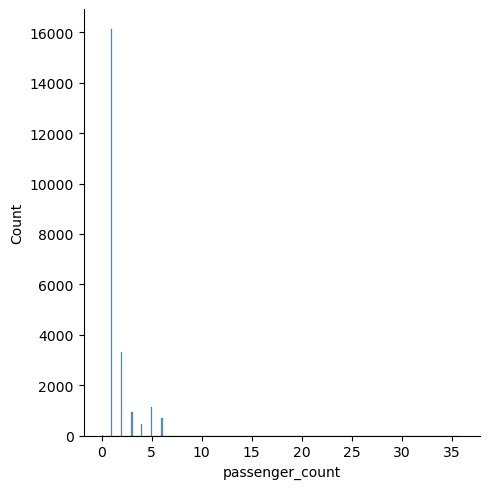

In [42]:
sns.displot(data['passenger_count'])

<Axes: xlabel='None', ylabel='fare_amount'>

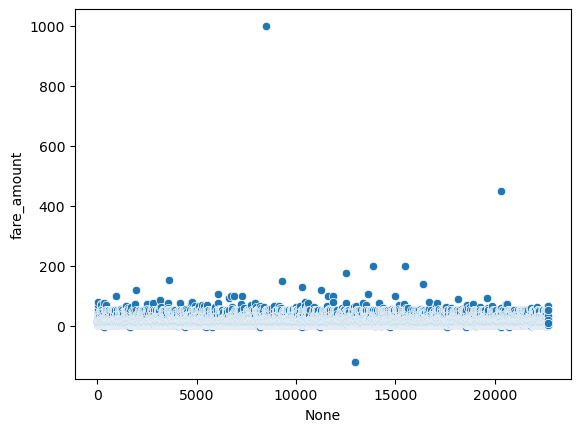

In [46]:
sns.scatterplot(x=data.index, y=data['fare_amount'])

<Axes: xlabel='None', ylabel='passenger_count'>

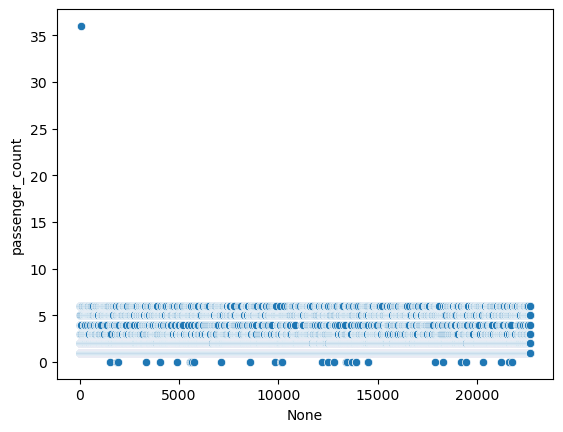

In [47]:
sns.scatterplot(x=data.index, y=data['passenger_count'])

<Axes: ylabel='fare_amount'>

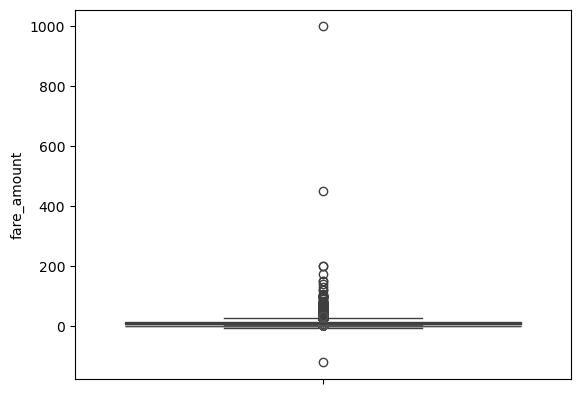

In [ ]:
sns.boxplot(data['fare_amount'])

<Axes: ylabel='passenger_count'>

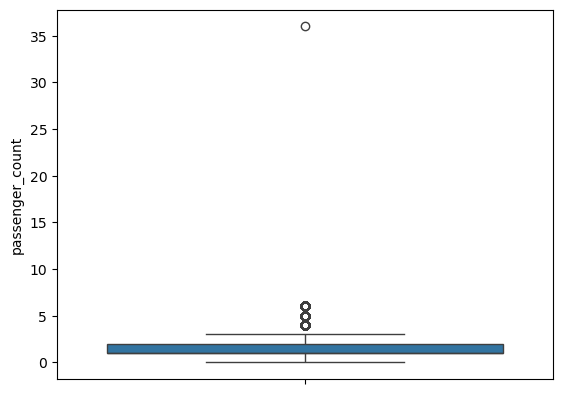

In [52]:
sns.boxplot(data['passenger_count'])

In [ ]:
#outllier 처리 방법
#제거
#제거 후 원본에 반영
#data = data[data['passenger_count']=<6]
data[data['passenger_count']>6]


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
64,Manuel Dickson,10/05/2017 9:39:28 AM,10/05/2017 9:42:32 AM,Debit Card,36,0.22,21.5,0.0,0.0


In [81]:
#데이터 잘못 삭제함
raw = pd.read_csv("trip.csv")
data = raw.copy()
data = data.dropna()


In [82]:
data[data['fare_amount']>=150]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00
8478,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.60,999.99,200.00,0.00
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.00,175.00,46.69,11.75
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.00,200.00,11.00,0.00
20314,Nicholas Thomas,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,Cash,2,0.00,450.00,0.00,0.00


In [83]:
data[data['fare_amount']<=0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
316,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1648,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4404,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.0,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
5724,William Holland,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,Debit Card,1,0.00,0.0,0.0,0.0
5760,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.0,0.0
8206,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
10283,Donna Larson,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,Credit Card,2,0.00,-2.5,0.0,0.0
10508,Travis Vega,03/30/2017 3:14:26 AM,03/30/2017 3:14:28 AM,Debit Card,1,0.00,0.0,0.0,0.0


In [84]:
data['fare_amount'].sort_values()

12946   -120.00
11206     -4.50
20700     -4.50
17604     -4.00
14716     -4.00
          ...  
12513    175.00
15476    200.00
13863    200.01
20314    450.00
8478     999.99
Name: fare_amount, Length: 22698, dtype: float64

In [88]:
data = data[(data["fare_amount"] >= 0) & (data["fare_amount"] < 150)].copy()

In [89]:
data['payment_method'].replace({'Credit Card':'Card', 'Debit Card':'Card'})

0        Card
1        Card
2        Card
3        Cash
4        Card
         ... 
22696    Cash
22697    Cash
22698    Card
22699    Card
22700    Cash
Name: payment_method, Length: 22677, dtype: object

In [ ]:
#날짜 및 시간 데이터 처리
from datetime import datetime

